In [5]:
import pandas as pd
final = pd.read_csv("df_featureEngineered.csv")
final.head()

,Store_Number,Item_Code,Item_Name,Retail_Price,Count_Week_Instock,Normalized_Sales_$L52W,Sales Bucket,Store_Name,Open_Date,Market_Name,...,Package_Type_100ml,Package_Type_1L,Package_Type_200-3gft,Package_Type_200ml,Package_Type_375ml,Package_Type_700ml,Package_Type_720ml,Package_Type_750gft,Package_Type_750ml,Count_Week_Instock_Normalized
0,2802,503010,Barton Vodka,6.99,52,4661.0,Sales included,2802 Overland Park,7/26/23,Kansas City,...,0,1,0,0,0,0,0,0,0,1.00
1,2705,503010,Barton Vodka,6.49,52,100.0,Sales included,2705 Avon,9/5/23,Indianapolis,...,0,1,0,0,0,0,0,0,0,1.00
2,2801,503010,Barton Vodka,7.49,39,NaN,Sales excluded for model test,2801 Wichita,11/14/23,Wichita,...,0,1,0,0,0,0,0,0,0,0.75
3,802,503175,Barton Vodka,12.99,52,4689.0,Sales included,802\nKennesaw,6/29/07,Georgia,...,0,0,0,0,0,0,0,0,0,1.00
4,2201,503175,Barton Vodka,13.99,52,3926.0,Sales included,2201\nWestbury,11/3/17,Long Island,...,0,0,0,0,0,0,0,0,0,1.00


In [6]:
print(final.isna().sum())

Store_Number                     0
Item_Code                        0
Item_Name                        0
Retail_Price                     0
Count_Week_Instock               0
                                ..
Package_Type_700ml               0
Package_Type_720ml               0
Package_Type_750gft              0
Package_Type_750ml               0
Count_Week_Instock_Normalized    0
Length: 78, dtype: int64


In [7]:
print(final.columns.tolist())

['Store_Number', 'Item_Code', 'Item_Name', 'Retail_Price', 'Count_Week_Instock', 'Normalized_Sales_$L52W', 'Sales Bucket', 'Store_Name', 'Open_Date', 'Market_Name', 'Store_Address', 'Households', 'Perc_HH_Income_above100K', 'Median_HH_Income', 'Average_Net_Worth', 'Perc_Population_Bachelor_Degree', 'Perc_Hispanic', 'Perc_Asian', 'Perc_African_American', 'Perc_Population_Age_50-70', 'Vodka', 'Market_Sales_L52wk', 'Count_Item_Location', 'Store_Age_Days', 'High_Education_High_Income', 'Diversity_Index', 'Age_Income_Ratio', 'Price_Per_Household', 'Vodka_Sales_Factor', 'Household_Income_to_NetWorth_Ratio', 'Household_Vodka_Factor', 'Education_Diversity_Factor', 'Diversity_Vodka_Factor', 'Age_HighIncome_Factor', 'Store_Size_Extra Large', 'Store_Size_Large', 'Store_Size_Medium', 'Store_Size_Small', 'Wealth_Diversity_Index', 'Store_State_AZ', 'Store_State_CA', 'Store_State_CO', 'Store_State_CT', 'Store_State_DE', 'Store_State_FL', 'Store_State_GA', 'Store_State_IL', 'Store_State_IN', 'Store_St

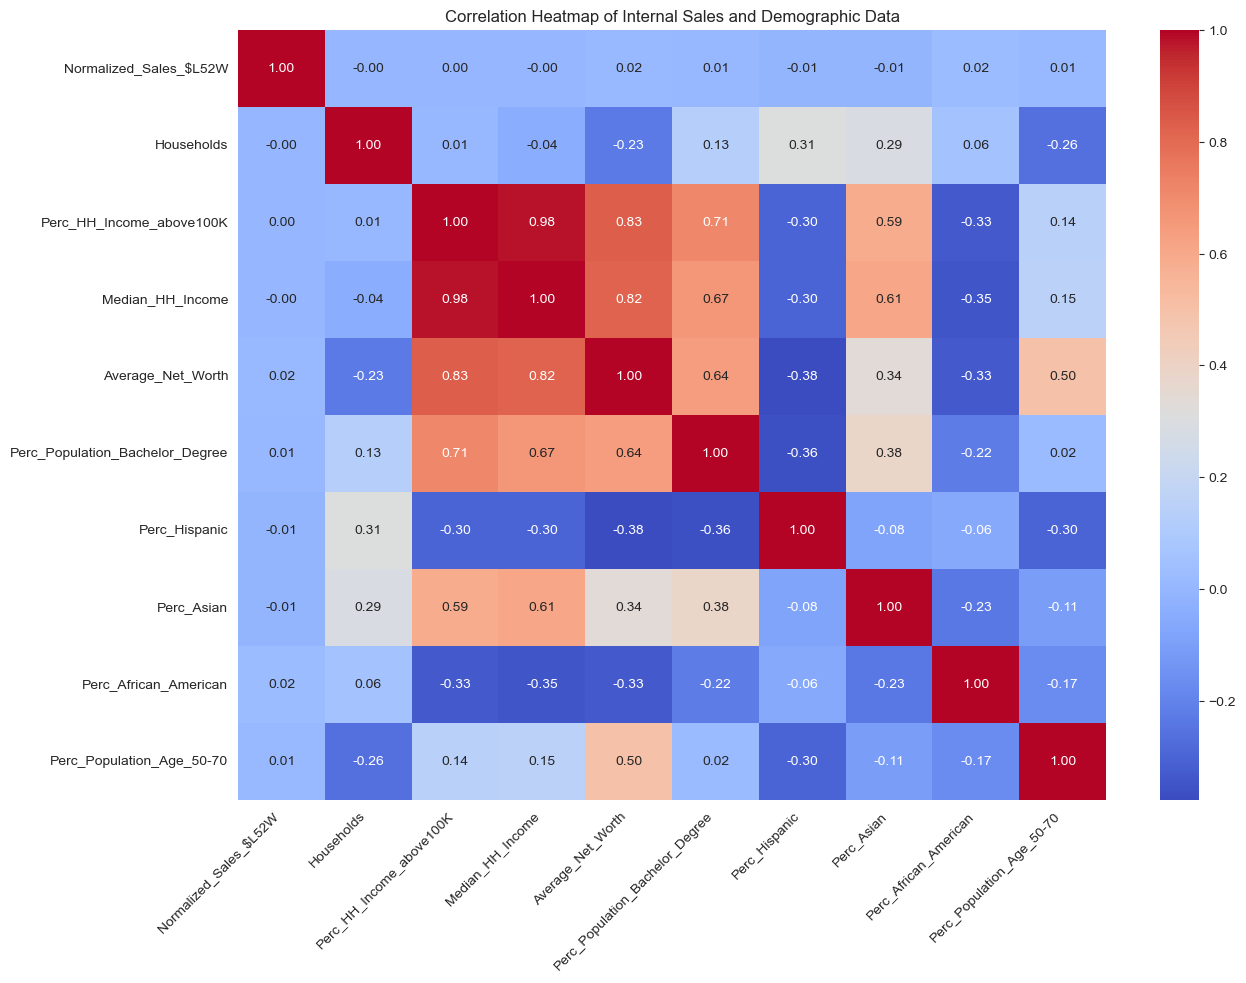

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the numerical variables based on your actual column names
heatmap_data = final[[
    'Normalized_Sales_$L52W',
    'Households',
    'Perc_HH_Income_above100K',
    'Median_HH_Income',
    'Average_Net_Worth',
    'Perc_Population_Bachelor_Degree',
    'Perc_Hispanic',
    'Perc_Asian',
    'Perc_African_American',
    'Perc_Population_Age_50-70',
]]

# Creating the correlation matrix
corr_matrix = heatmap_data.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Internal Sales and Demographic Data')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.show()


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = heatmap_data.dropna()

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Variable'] = vif_data.columns
vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Display VIF table
print(vif)

                          Variable         VIF
0           Normalized_Sales_$L52W    1.056692
1                       Households    6.501206
2         Perc_HH_Income_above100K  397.207184
3                 Median_HH_Income  392.785148
4                Average_Net_Worth   30.960584
5  Perc_Population_Bachelor_Degree   31.816823
6                    Perc_Hispanic    3.446886
7                       Perc_Asian    4.596535
8            Perc_African_American    2.731339
9        Perc_Population_Age_50-70   28.388762


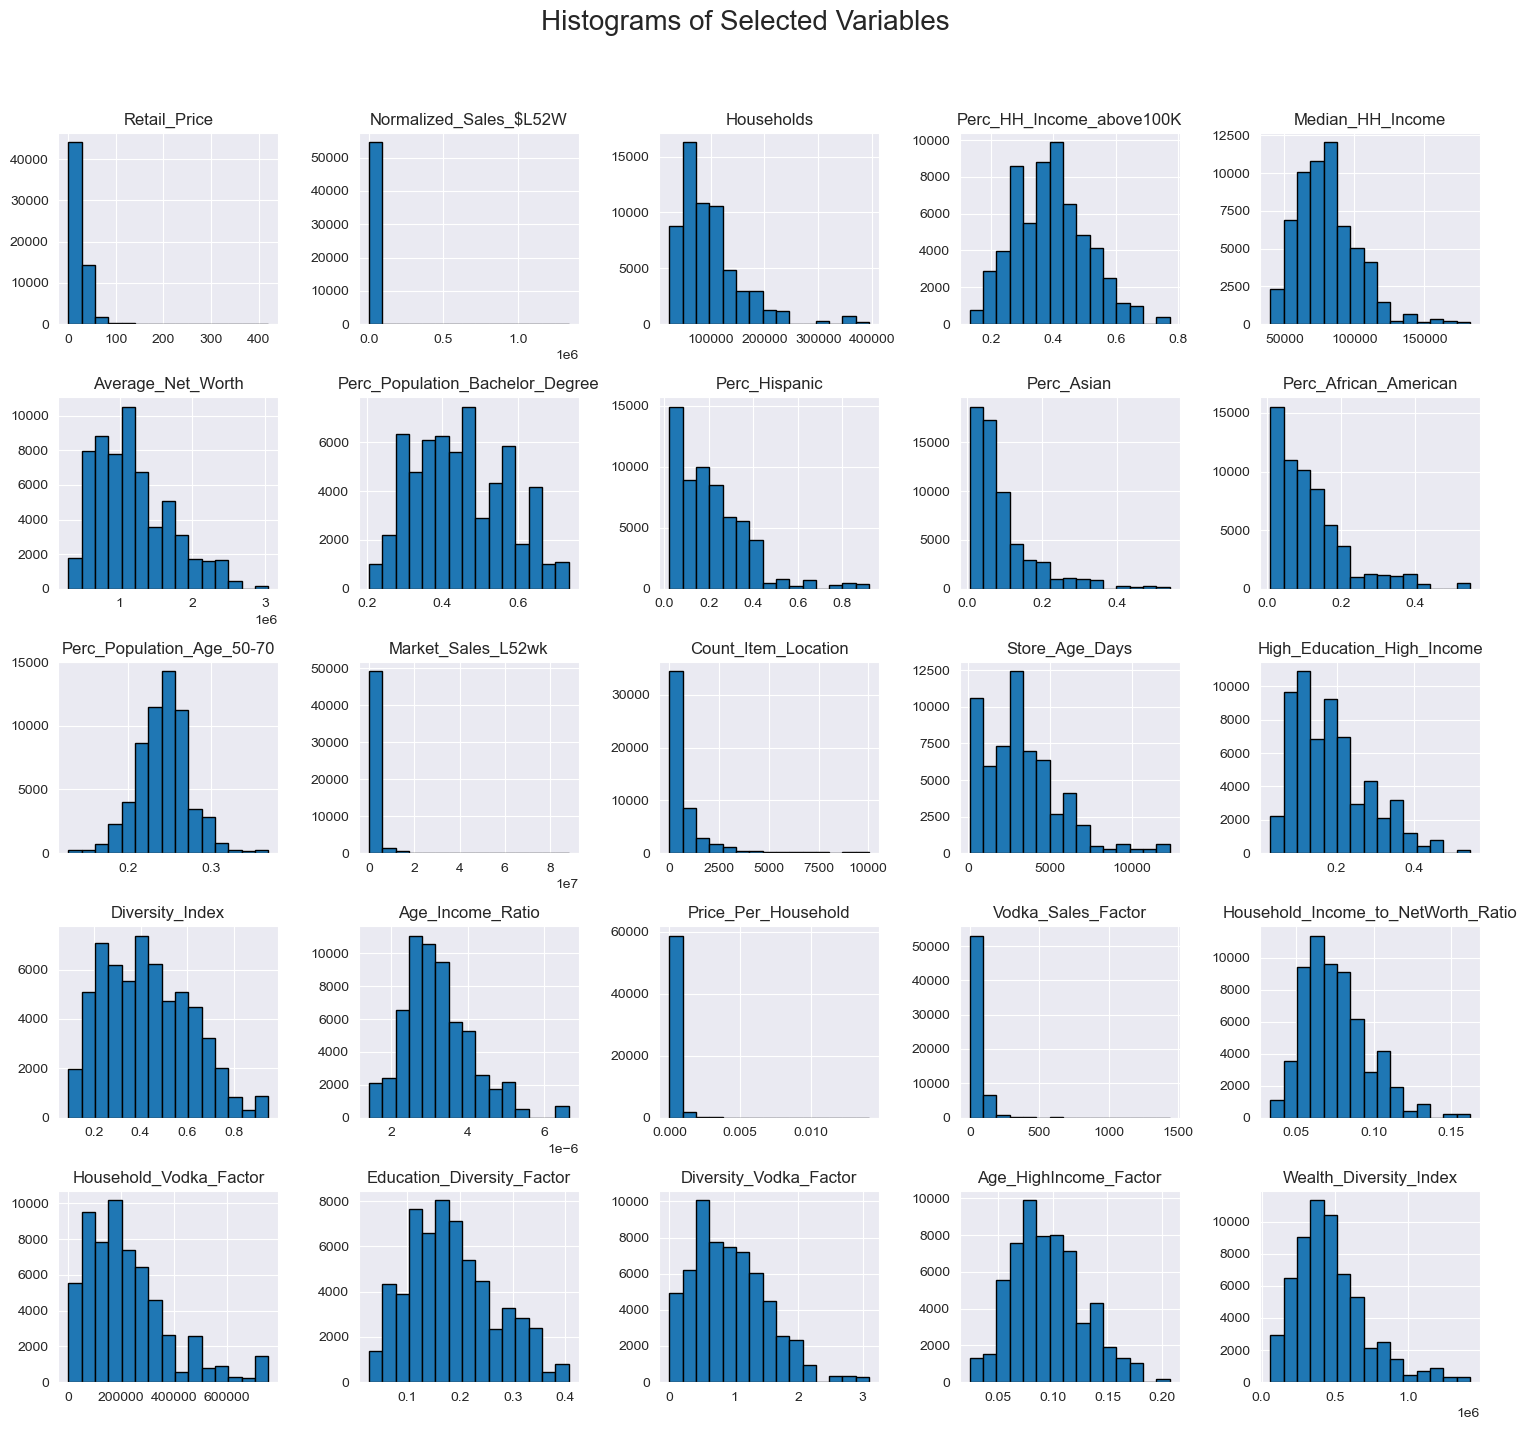

In [10]:
hist_data = final[[
    'Retail_Price', 'Normalized_Sales_$L52W', 'Households', 'Perc_HH_Income_above100K',
    'Median_HH_Income', 'Average_Net_Worth', 'Perc_Population_Bachelor_Degree',
    'Perc_Hispanic', 'Perc_Asian', 'Perc_African_American', 'Perc_Population_Age_50-70',
    'Market_Sales_L52wk', 'Count_Item_Location', 'Store_Age_Days', 'High_Education_High_Income',
    'Diversity_Index', 'Age_Income_Ratio', 'Price_Per_Household', 'Vodka_Sales_Factor',
    'Household_Income_to_NetWorth_Ratio', 'Household_Vodka_Factor', 'Education_Diversity_Factor',
    'Diversity_Vodka_Factor', 'Age_HighIncome_Factor',
     'Wealth_Diversity_Index'
]]

# Plotting histograms in a 3x3 layout
hist_data.hist(bins=15, figsize=(15, 15), edgecolor='black')
plt.suptitle('Histograms of Selected Variables', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

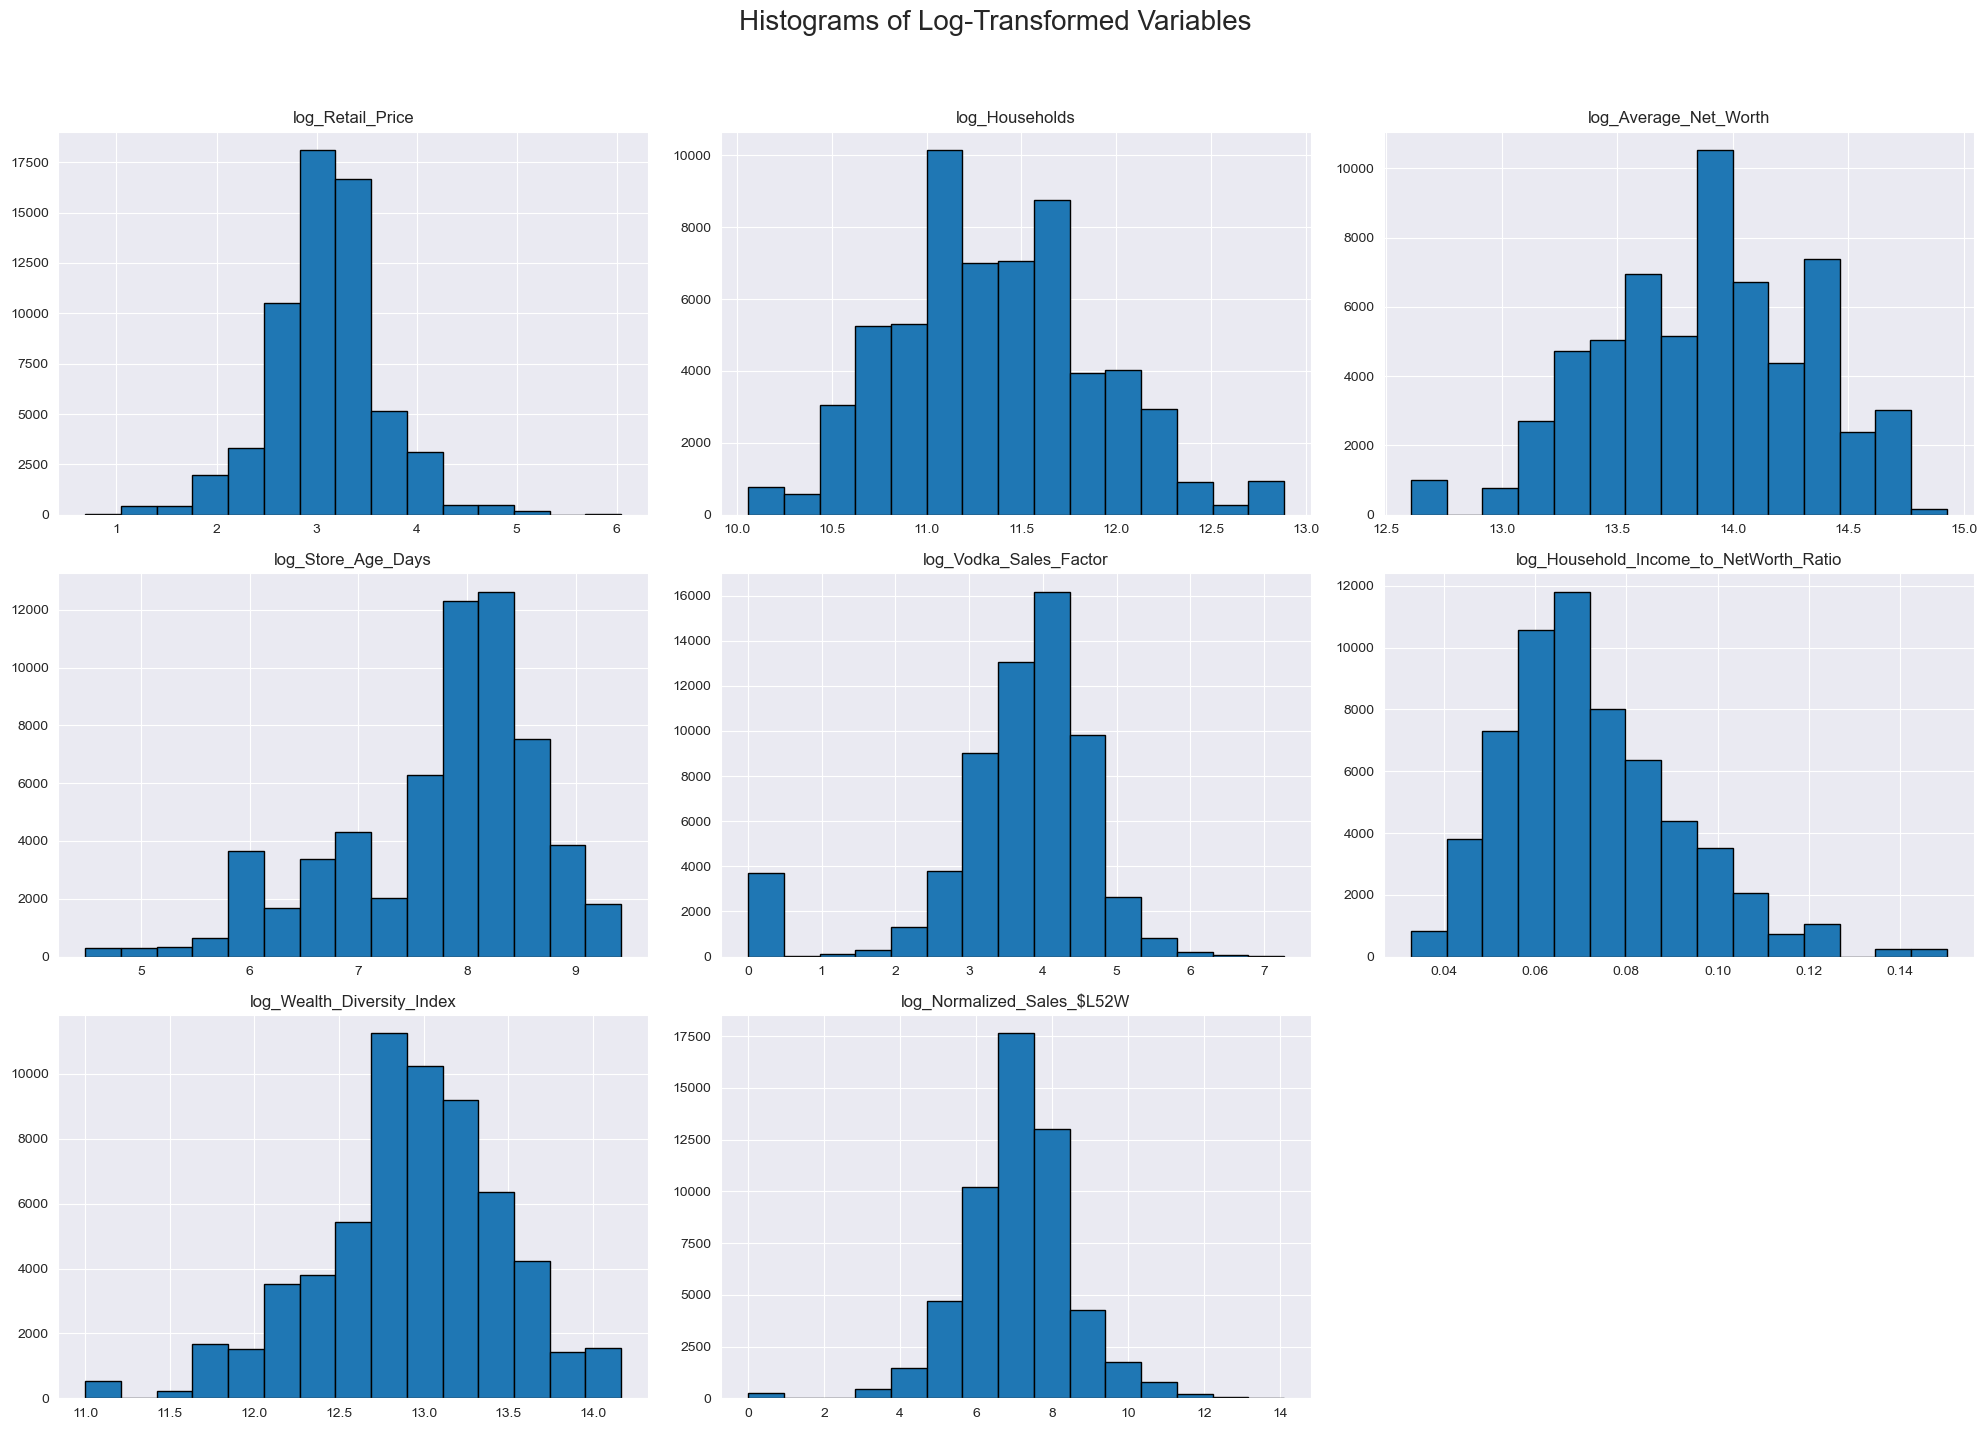

In [23]:
import numpy as np

# List of highly skewed variables to transform
skewed_columns = [
    'Retail_Price', 'Households', 'Average_Net_Worth', 'Store_Age_Days', 'Vodka_Sales_Factor', 'Household_Income_to_NetWorth_Ratio', 'Wealth_Diversity_Index', 'Normalized_Sales_$L52W'
]

# Apply log transformation to the selected columns
for col in skewed_columns:
    # Adding 1 to avoid log(0) and applying log transform
    final['log_' + col] = np.log1p(final[col])

# Display histograms of log-transformed variables to verify distribution changes
final[[f'log_{col}' for col in skewed_columns]].hist(bins=15, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Log-Transformed Variables', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


count    60973.000000
mean         0.000327
std          0.000318
min          0.000005
25%          0.000148
50%          0.000249
75%          0.000407
max          0.014129
Name: Price_Per_Household, dtype: float64

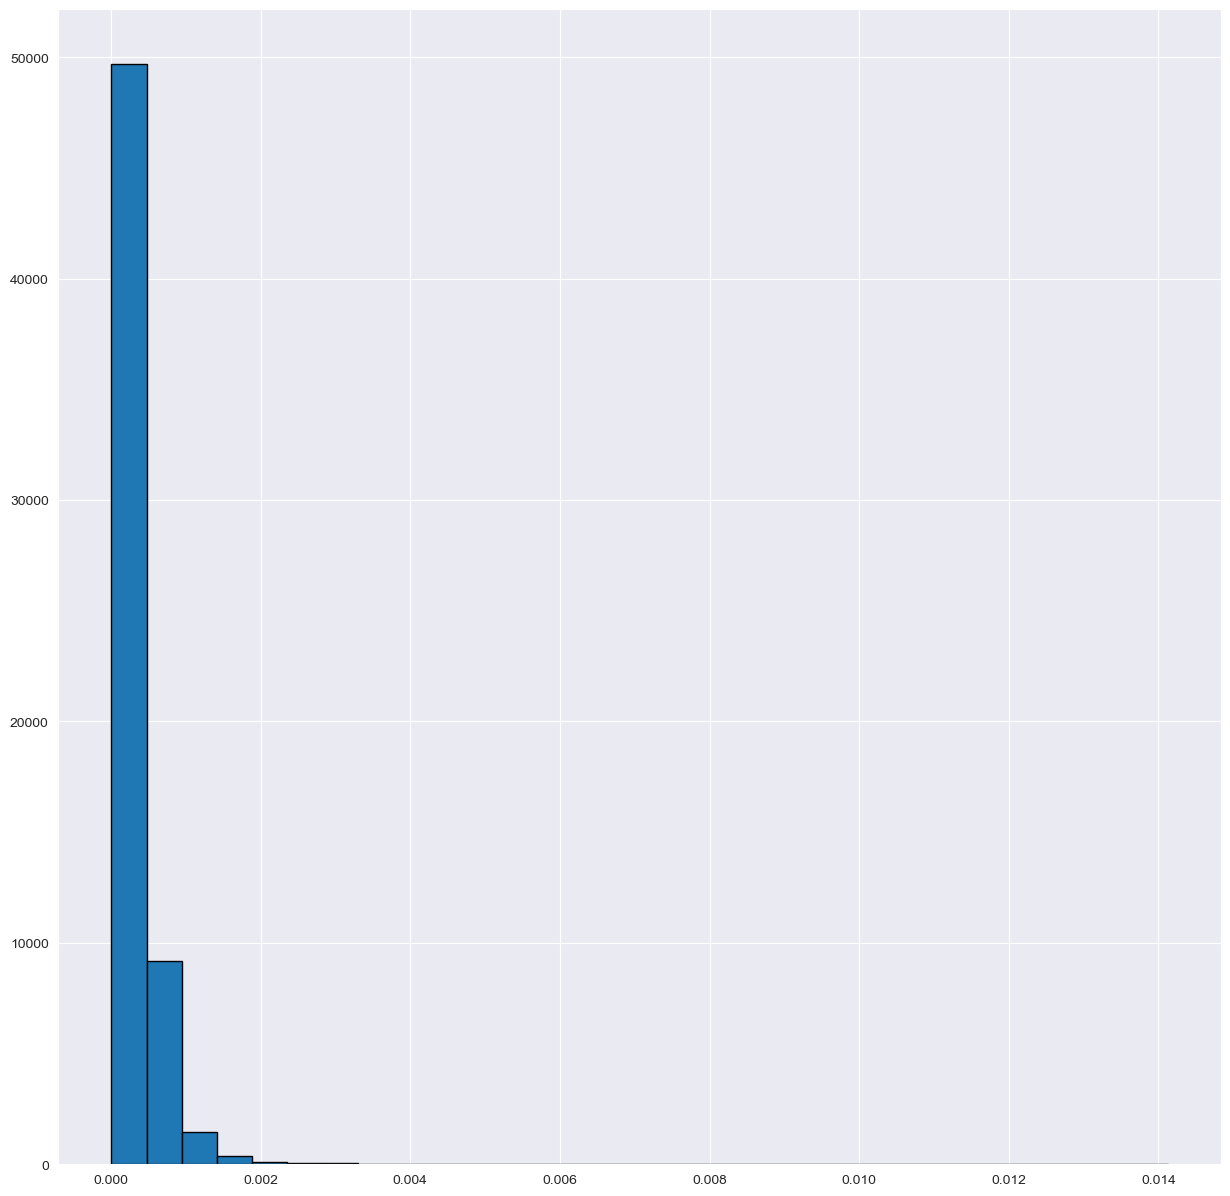

In [12]:
final['Price_Per_Household'].hist(bins=30, figsize=(15, 15), edgecolor='black')
final['Price_Per_Household'].describe()

In [13]:
print(final.columns.tolist())

['Store_Number', 'Item_Code', 'Item_Name', 'Retail_Price', 'Count_Week_Instock', 'Normalized_Sales_$L52W', 'Sales Bucket', 'Store_Name', 'Open_Date', 'Market_Name', 'Store_Address', 'Households', 'Perc_HH_Income_above100K', 'Median_HH_Income', 'Average_Net_Worth', 'Perc_Population_Bachelor_Degree', 'Perc_Hispanic', 'Perc_Asian', 'Perc_African_American', 'Perc_Population_Age_50-70', 'Vodka', 'Market_Sales_L52wk', 'Count_Item_Location', 'Store_Age_Days', 'High_Education_High_Income', 'Diversity_Index', 'Age_Income_Ratio', 'Price_Per_Household', 'Vodka_Sales_Factor', 'Household_Income_to_NetWorth_Ratio', 'Household_Vodka_Factor', 'Education_Diversity_Factor', 'Diversity_Vodka_Factor', 'Age_HighIncome_Factor', 'Store_Size_Extra Large', 'Store_Size_Large', 'Store_Size_Medium', 'Store_Size_Small', 'Wealth_Diversity_Index', 'Store_State_AZ', 'Store_State_CA', 'Store_State_CO', 'Store_State_CT', 'Store_State_DE', 'Store_State_FL', 'Store_State_GA', 'Store_State_IL', 'Store_State_IN', 'Store_St

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Split the data into 'data' and 'pred' based on 'Sales Bucket'
data = final[final['Sales Bucket'] == 'Sales included']
pred = final[final['Sales Bucket'] == 'Sales excluded for model test']

# Define the features and target for 'data' (including dummy variables)
X = data[['Retail_Price', 'Perc_HH_Income_above100K', 'Median_HH_Income', 'Perc_Population_Bachelor_Degree', 'Perc_Population_Age_50-70', 'Vodka','Perc_Hispanic', 'Perc_Asian', 'Perc_African_American', 'High_Education_High_Income', 'Diversity_Index', 'Age_Income_Ratio',  'Household_Vodka_Factor', 'Education_Diversity_Factor', 'Diversity_Vodka_Factor', 'Age_HighIncome_Factor', 'Store_Size_Extra Large', 'Store_Size_Large', 'Store_Size_Medium', 'Store_Size_Small', 'Store_State_AZ', 'Store_State_CA', 'Store_State_CO', 'Store_State_CT', 'Store_State_DE', 'Store_State_FL', 'Store_State_GA', 'Store_State_IL', 'Store_State_IN', 'Store_State_KS', 'Store_State_KY', 'Store_State_LA', 'Store_State_MA', 'Store_State_MD', 'Store_State_MI', 'Store_State_MN', 'Store_State_MO', 'Store_State_NJ', 'Store_State_NM', 'Store_State_NV', 'Store_State_NY', 'Store_State_SC', 'Store_State_TN', 'Store_State_TX', 'Store_State_WA', 'Store_State_WI', 'Package_Type_1.5L', 'Package_Type_1.75L', 'Package_Type_1.75Lgft', 'Package_Type_100ml', 'Package_Type_1L', 'Package_Type_200-3gft', 'Package_Type_200ml', 'Package_Type_375ml', 'Package_Type_700ml', 'Package_Type_720ml', 'Package_Type_750gft', 'Package_Type_750ml', 'Count_Week_Instock_Normalized', 'log_Households', 'log_Average_Net_Worth', 'log_Store_Age_Days', 'log_Vodka_Sales_Factor', 'log_Household_Income_to_NetWorth_Ratio', 'log_Wealth_Diversity_Index']]

y = data['Normalized_Sales_$L52W']  # Use the original target variable

# Split 'data' into training + validation (90%) and holdout (10%)
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(X, y, test_size=0.1, random_state=2424)

# Split the training + validation set into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=2424)

# Define the pipeline with scaling for numerical features
numerical_features = X.columns  # Assumes all columns are numerical or pre-dummy encoded

preprocessor = StandardScaler()

# Lasso regression pipeline
lasso_pipeline = Pipeline(steps=[
    ('scaler', preprocessor),
    ('lasso', LassoCV(cv=5, max_iter=10000))
])

# Fit the Lasso regression model on training data
lasso_pipeline.fit(X_train, y_train)

# Print model performance on training and validation sets
print("Lasso Regression Model Performance:")
print("Training Score:", lasso_pipeline.score(X_train, y_train))
print("Validation Score:", lasso_pipeline.score(X_val, y_val))

Lasso Regression Model Performance:
Training Score: 0.039810804750119
Validation Score: 0.02678037159501867


In [15]:
# Get the coefficients of the Lasso model
lasso_coefficients = lasso_pipeline.named_steps['lasso'].coef_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coefficients
})

# Filter to show only non-zero coefficients, which are the features selected by Lasso
non_zero_importance = feature_importance[feature_importance['Coefficient'] != 0]

# Sort by absolute coefficient value in descending order to see the most important features at the top
non_zero_importance = non_zero_importance.reindex(non_zero_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Display feature importance
print(non_zero_importance)

                                   Feature  Coefficient
47                      Package_Type_1.75L  2519.320691
58           Count_Week_Instock_Normalized   872.697361
5                                    Vodka   594.025509
50                         Package_Type_1L   557.893208
48                   Package_Type_1.75Lgft   489.174008
40                          Store_State_NY   366.442671
56                     Package_Type_750gft   339.912711
61                      log_Store_Age_Days   332.730019
53                      Package_Type_375ml  -324.075419
21                          Store_State_CA  -228.313161
24                          Store_State_DE   227.290798
42                          Store_State_TN   174.449168
19                        Store_Size_Small   170.481430
52                      Package_Type_200ml  -106.919422
59                          log_Households    93.092253
35                          Store_State_MN    76.516842
31                          Store_State_LA    65

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def print_evaluation_metrics(y_true, y_pred, set_name="Evaluation"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{set_name} RMSE: {rmse:.4f}")
    print(f"{set_name} MAE: {mae:.4f}")

y_val_pred = lasso_pipeline.predict(X_val)

print_evaluation_metrics(y_val, y_val_pred, set_name="Validation")

Validation RMSE: 19102.1690
Validation MAE: 4433.7214


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data = final[final['Sales Bucket'] == 'Sales included']
pred = final[final['Sales Bucket'] == 'Sales excluded for model test']

X = data[['Vodka', 'Store_Size_Extra Large',
          'Store_Size_Large', 'Store_Size_Medium', 'Store_Size_Small', 'Store_State_AZ', 'Store_State_CA',
          'Store_State_CO', 'Store_State_CT', 'Store_State_DE', 'Store_State_FL', 'Store_State_GA',
          'Store_State_IL', 'Store_State_IN', 'Store_State_KS', 'Store_State_KY', 'Store_State_LA',
          'Store_State_MA', 'Store_State_MD', 'Store_State_MI', 'Store_State_MN', 'Store_State_MO',
          'Store_State_NJ', 'Store_State_NM', 'Store_State_NV', 'Store_State_NY', 'Store_State_SC',
          'Store_State_TN', 'Store_State_TX', 'Store_State_WA', 'Store_State_WI', 'Package_Type_1.5L',
          'Package_Type_1.75L', 'Package_Type_1.75Lgft', 'Package_Type_100ml', 'Package_Type_1L',
          'Package_Type_200-3gft', 'Package_Type_200ml', 'Package_Type_375ml', 'Package_Type_700ml',
          'Package_Type_720ml', 'Package_Type_750gft', 'Package_Type_750ml', 'Count_Week_Instock_Normalized',
          'log_Retail_Price', 'log_Households',
          'log_Store_Age_Days']]
y = data['Normalized_Sales_$L52W']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2424)

# Define the pipeline with scaling for numerical features
preprocessor = StandardScaler()

# Linear regression pipeline
linear_pipeline = Pipeline(steps=[
    ('scaler', preprocessor),
    ('linear', LinearRegression())
])

# Fit the linear regression model on training data
linear_pipeline.fit(X_train, y_train)

# Print model performance on training and validation sets
print("Linear Regression Model Performance:")
print("Training Score (R^2):", linear_pipeline.score(X_train, y_train))
print("Validation Score (R^2):", linear_pipeline.score(X_val, y_val))

# Calculate predictions for evaluation metrics
y_pred = linear_pipeline.predict(X_val)
print("Validation RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("Validation MAE:", mean_absolute_error(y_val, y_pred))

Linear Regression Model Performance:
Training Score (R^2): 0.0379389616796465
Validation Score (R^2): 0.03458587713509831
Validation RMSE: 17409.361010064134
Validation MAE: 4666.227659657542


In [24]:
import statsmodels.api as sm

# Split the data into 'data' and 'pred' based on 'Sales Bucket'
data = final[final['Sales Bucket'] == 'Sales included']

# Define the features and target for 'data' (including dummy variables)
X = data[['Vodka', 'Store_Size_Extra Large',
          'Store_Size_Large', 'Store_Size_Medium', 'Store_Size_Small', 'Package_Type_1.5L',
          'Package_Type_1.75L', 'Package_Type_1.75Lgft', 'Package_Type_100ml', 'Package_Type_1L',
          'Package_Type_200-3gft', 'Package_Type_200ml', 'Package_Type_375ml', 'Package_Type_700ml',
          'Package_Type_720ml', 'Package_Type_750gft', 'Package_Type_750ml', 'Count_Week_Instock_Normalized',
          'log_Retail_Price', 'log_Households',
          'log_Store_Age_Days']]
y = data['log_Normalized_Sales_$L52W']  # Use the original target variable

# Fit the linear regression model using statsmodels
model = sm.OLS(y, X).fit()

# Print the model summary with coefficients and p-values
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     log_Normalized_Sales_$L52W   R-squared:                       0.198
Model:                                    OLS   Adj. R-squared:                  0.198
Method:                         Least Squares   F-statistic:                     712.2
Date:                        Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                                17:33:42   Log-Likelihood:                -91465.
No. Observations:                       54894   AIC:                         1.830e+05
Df Residuals:                           54874   BIC:                         1.831e+05
Df Model:                                  19                                         
Covariance Type:                    nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------